# MDM5053 Big Data Management: Assessment 3

## Big Data Analytics and Techniques (PySpark)

## 1.Data Loading

### 1.1 Install and Import Libraries/Packages

In [ ]:
%%time
'''
# Pip install commands.
# Elaboration: Use the !pip install command if error occurs when importing
              the libraries.
'''

!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
CPU times: user 33.5 ms, sys: 16.9 ms, total: 50.4 ms
Wall time: 4.17 s


In [ ]:
%%time
# Import relavant libraries/packages
# Elaboration:

import pandas as pd # Data manipulation and analysis
import numpy as np # Arrays
import matplotlib.pyplot as plt # Data visualizations (subplots)
import seaborn as sns # Data visualizations (pairplots, countplots, boxplot, heatmap)

from pyspark.sql import SparkSession # Import Spark API/Session
from pyspark.sql import functions as F # Use functions
from pyspark.sql import Window # Utility functions for defining window in DataFrames.
from pyspark.sql.types import IntegerType, BooleanType, DateType # DataTypes
from pyspark.sql.functions import col, isnan, when, count, rank, sum, desc, trim, lower # Aggreviate functions
from pyspark.ml import Pipeline # Create a Pipeline for feature engineering process - save time
from pyspark.ml.feature import VectorAssembler, StandardScaler, OneHotEncoder # Vectorization, Scaling, Encoding
from pyspark.ml.classification import LogisticRegression # Logistic Regression algorirthm
#from pyspark.ml.tuning import CrossValidator
from pyspark.mllib.stat import Statistics # Correlation
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics # Model performance & evaluation

%matplotlib inline
'''
# Sets the backend of matplotlib to the 'inline' backend.
# With this backend, the output of plotting commands is displayed inline within
  frontends like the Jupyter notebook, directly below the code cell that
  produced it.
# The resulting plots will then also be stored in the notebook document.
'''

CPU times: user 897 ms, sys: 303 ms, total: 1.2 s
Wall time: 1.1 s


"\n# Sets the backend of matplotlib to the 'inline' backend. \n# With this backend, the output of plotting commands is displayed inline within \n  frontends like the Jupyter notebook, directly below the code cell that \n  produced it. \n# The resulting plots will then also be stored in the notebook document.\n"

In [ ]:
%%time
'''
# Start a Spark session
# Elaboration: Set the Spark session as local, name it Colab since I use
               Google Colab for this assessment, config the port, and
               Gets an existing SparkSession or, if there is no existing one,
               creates a new one based on the options set in this builder.
'''

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

spark

CPU times: user 87.1 ms, sys: 31.8 ms, total: 119 ms
Wall time: 9.33 s


### 1.2 Import/Load Dataset

In [ ]:
%%time
'''
# Import/Load dataset.
# Elaboration: To import/load the .csv dataset into PySpark session and
                save into df (variable) with header and inferSchema set to true
                to detect the dataset variables and allow PySpark to detect the
                data types.
'''

df = spark.read.format("csv").load("HeartDisease.csv", header=True, inferSchema=True)

df.printSchema()

root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)

CPU times: user 110 ms, sys: 18.2 ms, total: 129 ms
Wall time: 19.7 s


## 2.Data Preprocessing & Transformation

### 2.1 Dataset Infographics

In [ ]:
%%time
# Show the number of rows/observations
df.count()

CPU times: user 18.7 ms, sys: 1.5 ms, total: 20.2 ms
Wall time: 2.17 s


253680

In [ ]:
%%time
# Show the number of columns/variables
len(df.columns)

CPU times: user 4.1 ms, sys: 0 ns, total: 4.1 ms
Wall time: 40 ms


22

In [ ]:
%%time
'''
# Shows descriptive stats of numeric features.
# Elaboration: Describes the basic information about variables in the dataset
                and highlight potential relationships between variables.
'''

df.describe().toPandas()

CPU times: user 80 ms, sys: 14.2 ms, total: 94.1 ms
Wall time: 8.74 s


,summary,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,count,253680,253680,253680,253680,253680,253680,253680,253680,253680,...,253680,253680,253680,253680,253680,253680,253680,253680,253680,253680
1,mean,0.09418558814254178,0.4290011037527594,0.4241209397666351,0.9626695048880479,28.382363607694735,0.44316855881425415,0.04057079785556607,0.29692131819615264,0.7565436770734784,...,0.9510525070955534,0.08417691579943236,2.5113923052664773,3.1847721538946705,4.2420805739514345,0.16822374645222327,0.4403421633554084,8.032119205298013,5.050433617155472,6.053874960580258
2,stddev,0.29208731475075256,0.4949344626899023,0.49420980465688424,0.18957075436272522,6.6086942014059975,0.496760666778557,0.1972940994001602,0.6981597284091084,0.4291690433970441,...,0.21575870631073985,0.2776535008576234,1.0684773622803978,7.412846696196193,8.717951307175234,0.37406559473280016,0.4964291631185047,3.0542204341684847,0.9857741757276464,2.0711475662715304
3,min,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,max,1.0,1.0,1.0,1.0,98.0,1.0,1.0,2.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,1.0,13.0,6.0,8.0


### 2.2 Feature Conversion/Cleansing

In [ ]:
%%time
# Change target variable name
# Elaboration: Simplify the name.

df = df.withColumnRenamed('HeartDiseaseorAttack', 'HeartDisease')
df.show()

+------------+------+--------+---------+----+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|HeartDisease|HighBP|HighChol|CholCheck| BMI|Smoker|Stroke|Diabetes|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|
+------------+------+--------+---------+----+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|         0.0|   1.0|     1.0|      1.0|40.0|   1.0|   0.0|     0.0|         0.0|   0.0|    1.0|              0.0|          1.0|        0.0|    5.0|    18.0|    15.0|     1.0|0.0| 9.0|      4.0|   3.0|
|         0.0|   0.0|     0.0|      0.0|25.0|   1.0|   0.0|     0.0|         1.0|   0.0|    0.0|              0.0|          0.0|        1.0|    3.0|     0.0|     0.0|     0.0|0.0| 7.0|      6.

In [ ]:
%%time
'''
# Group by and show the count of the target class.
# Elaboration: Check whether the target class is balanced or not
              (results show not balanced).
'''

df.groupby("HeartDisease").count().show()

+------------+------+
|HeartDisease| count|
+------------+------+
|         0.0|229787|
|         1.0| 23893|
+------------+------+

CPU times: user 16.3 ms, sys: 1.78 ms, total: 18.1 ms
Wall time: 1.74 s


In [ ]:
%%time
# Convert numerical variables from Double/Float to Integer Type
# Elaboration: For personal understanding.

df = df.withColumn("BMI", df["BMI"].cast(IntegerType()))
df = df.withColumn("MentHlth", df["MentHlth"].cast(IntegerType()))
df = df.withColumn("PhysHlth", df["PhysHlth"].cast(IntegerType()))

df.printSchema()

root
 |-- HeartDisease: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)

CPU times: user 12.2 ms, sys: 0 ns, total: 12.2 ms
Wall time: 112 ms


### 2.3 Check For Whitespaces and Missing/Null values

In [ ]:
%%time
'''
# Find amd show the count for empty, None, Null, Nan with string literals.
# Identify number of missing (null) values and whitespaces in the dataset.
# Elaboration: The reason for the missing data is important to consider,
              because it helps to determine the type of missing data and
              what to do about it.
'''

df1 = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c
                           )).alias(c)
                    for c in df.columns])

df1.show()

+------------+------+--------+---------+---+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|HeartDisease|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|Diabetes|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|
+------------+------+--------+---------+---+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|           0|     0|       0|        0|  0|     0|     0|       0|           0|     0|      0|                0|            0|          0|      0|       0|       0|       0|  0|  0|        0|     0|
+------------+------+--------+---------+---+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+


## 3.Exploratory Data Analysis (EDA)

### 3.1 Distribution of Heart Disease

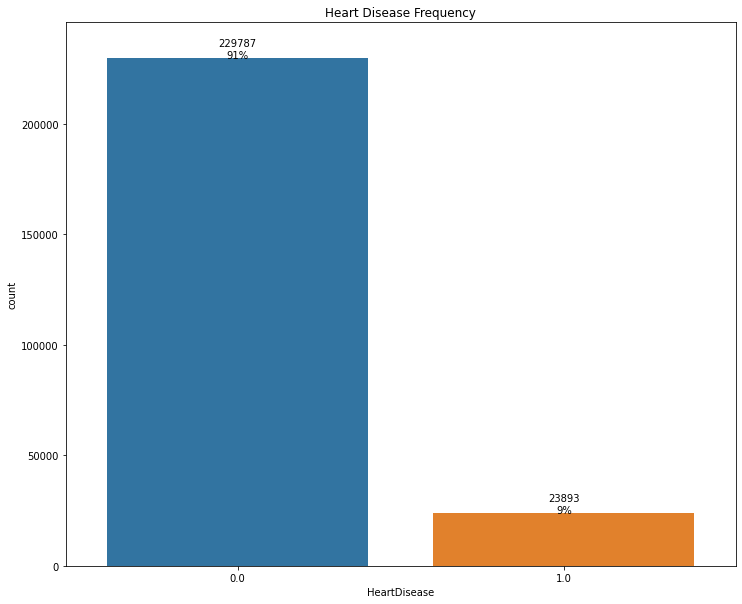

CPU times: user 3.58 s, sys: 942 ms, total: 4.52 s
Wall time: 9.18 s


In [ ]:
%%time
# Distribution of Heart Disease.
# Elaboration: Visualize the target class for easier understanding.

# Show the barchart of target class.
df_pd = df.toPandas()
plt.figure(figsize=(12,10))
ax_vc = sns.countplot(x='HeartDisease', data=df_pd, order=df_pd['HeartDisease'].value_counts().index)

# Display percentages above each bar so that the sum per value equals 100%
bars = ax_vc.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax_vc.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0f}\n{1:.0%}'.format(height_l, height_l/total), ha="center")
    ax_vc.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0f}\n{1:.0%}'.format(height_r, height_r/total), ha="center")
plt.margins(0.07)

# Display title
plt.title('Heart Disease Frequency');

plt.show()

### 3.2 Distribution of All Features

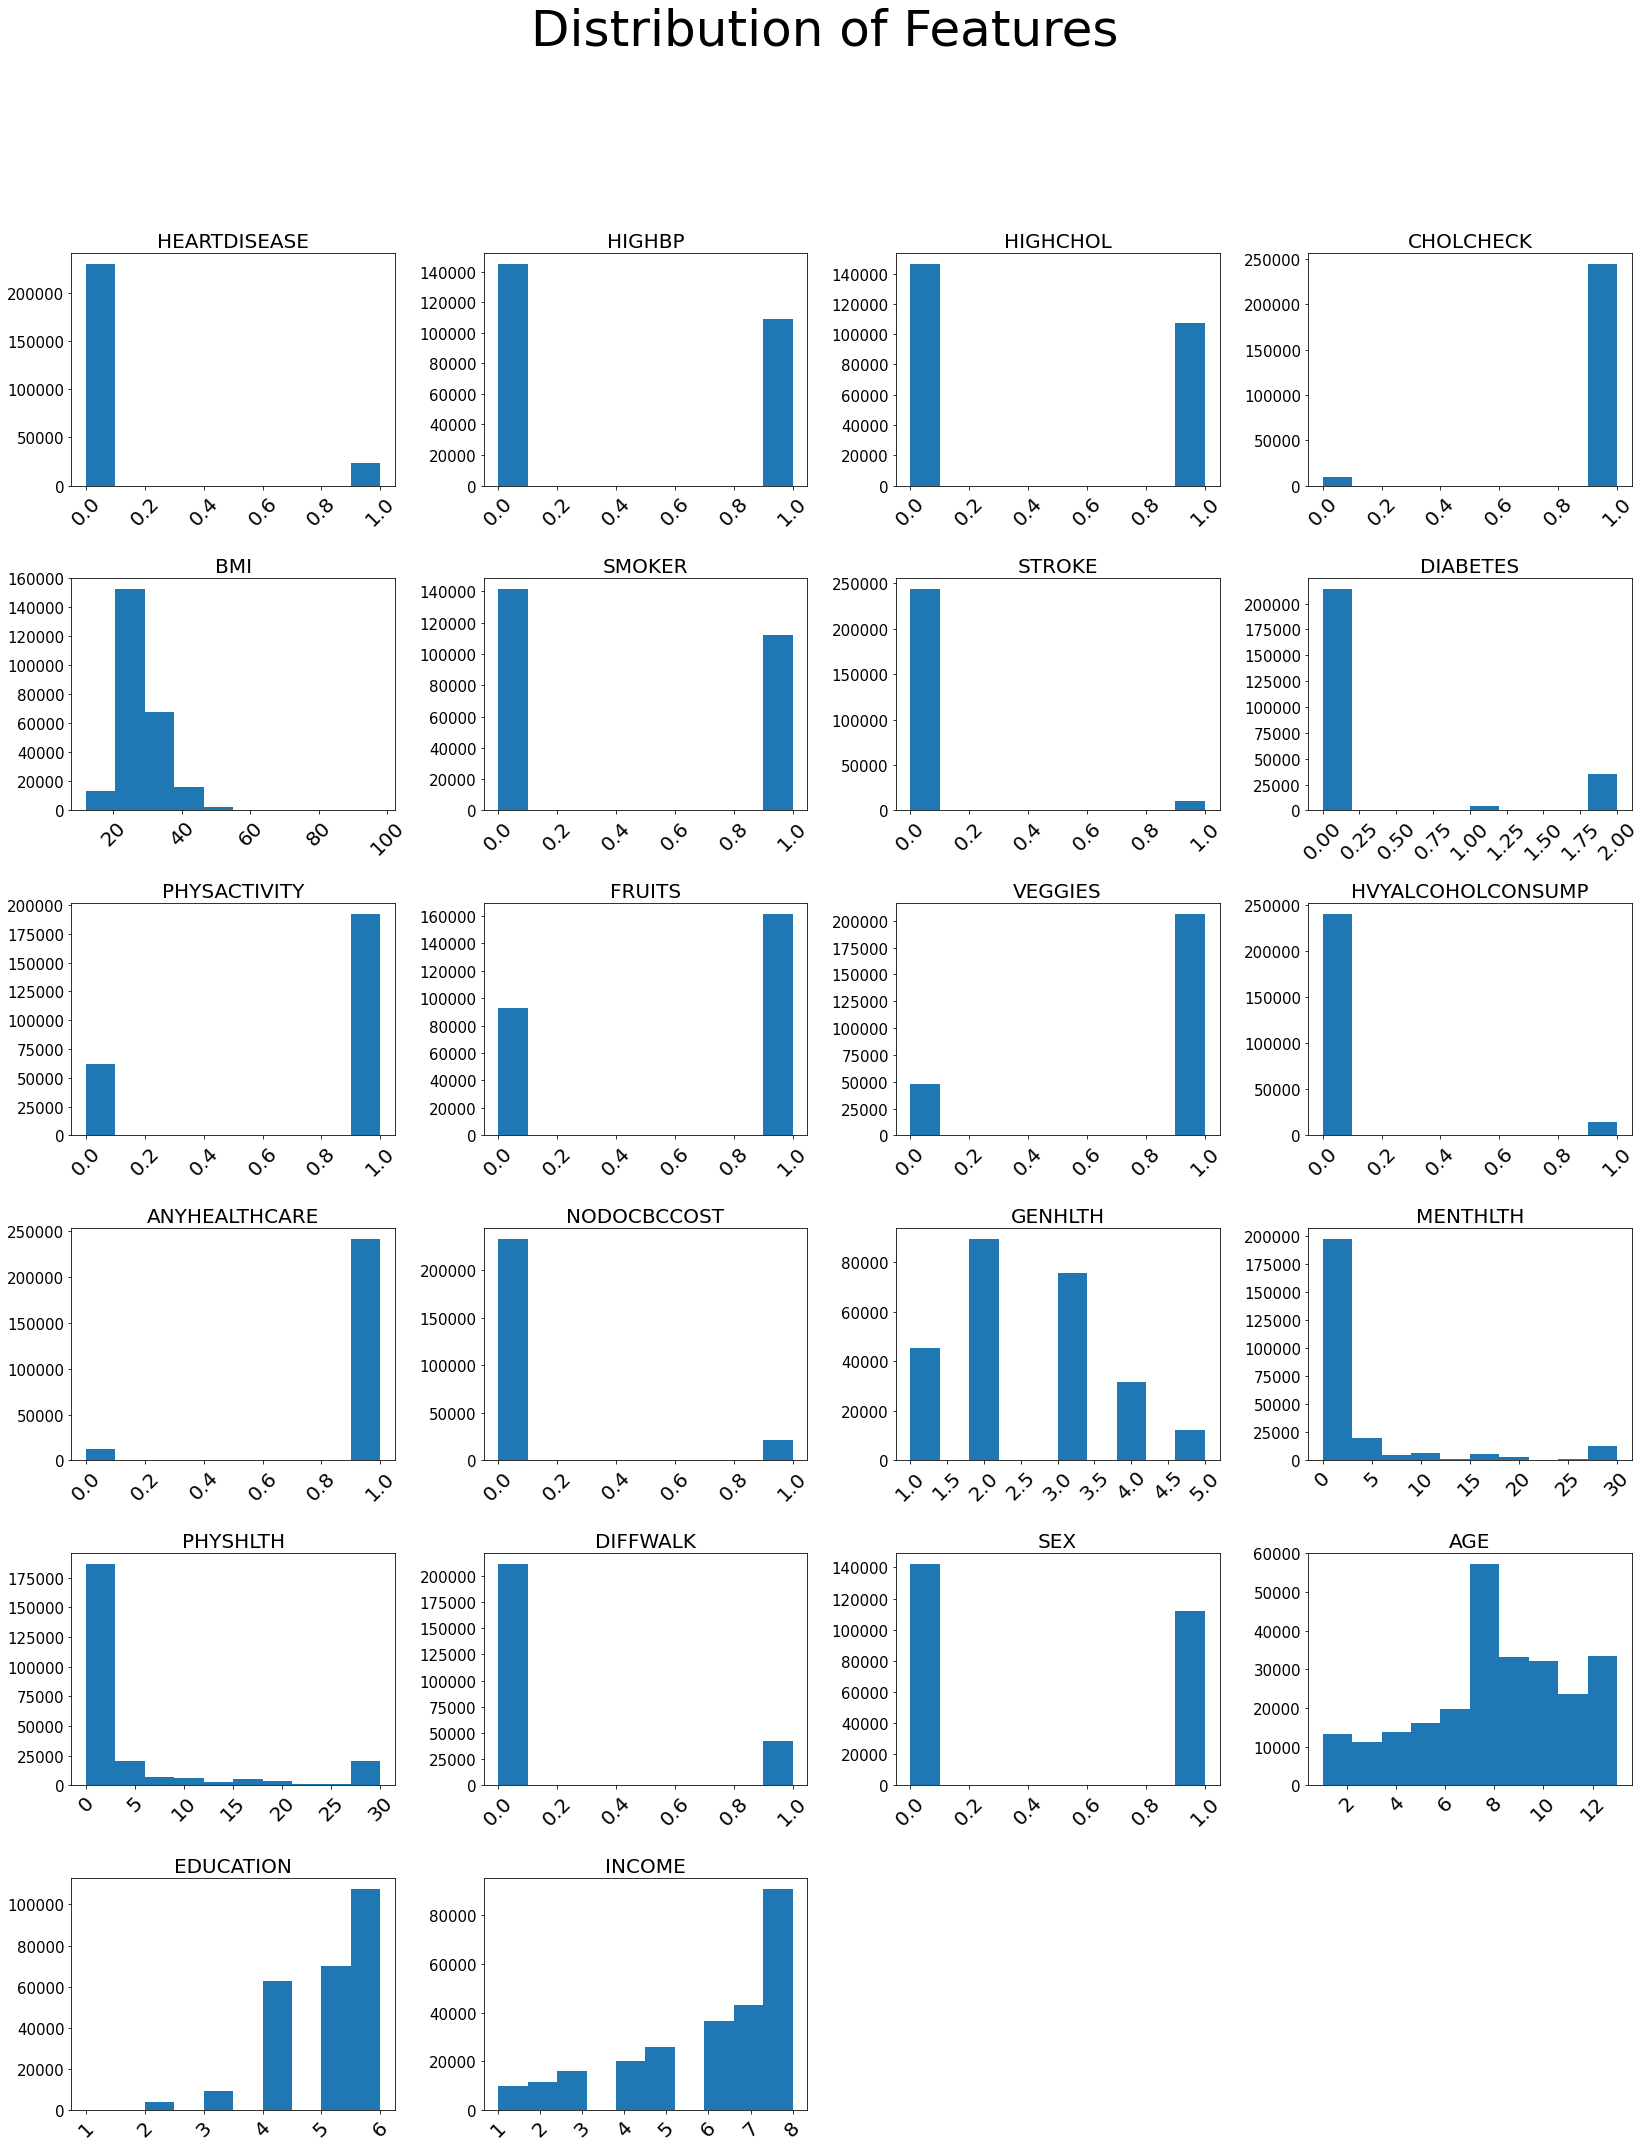

CPU times: user 1min 16s, sys: 3.05 s, total: 1min 19s
Wall time: 1min 55s


In [ ]:
%%time
'''
# Show the distribution of all features.
# Elaboration: To see if there are any extreme values (outliers),
          if there are missing data, or data that has been entered incorrectly.
'''

plot_size_x, plot_size_y = 5, 5
figsize_x, figsize_y = plot_size_x * 4 + 3, plot_size_y * 6 + 1
figsize=(figsize_x, figsize_y)
fig = plt.figure(figsize=figsize)
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")

for col, num in zip(df_pd.describe().columns, range(1,24)):
  ax = fig.add_subplot(6, 4, num)
  ax.hist(df.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4) # original is (top=0.85, hspace=0.4)
plt.show()

### 3.3 Age Group and BMI

In [ ]:
%%time
# Use unbounded window frame and functions: ranking/analytic/aggregate functions for calculation
window = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

# Create age group table
age_group_tab = df.select(['Age','BMI']).\
                      groupBy('Age').\
                          agg(
                              F.count('BMI').alias('Count'),
                              F.mean('BMI').alias('BMI_AVG'),
                              F.min('BMI').alias('BMI_MIN'),
                              F.max('BMI').alias('BMI_MAX')).\
                          withColumn('total', sum(F.col('Count')).over(window)).\
                          withColumn('Percent', F.col('Count')*100 / F.col('total')).\
                          drop(F.col('total')).sort(desc('Percent'))

# Show the age group table with BMI (Avg, Min, Max) and overall count (%)
age_group_tab.toPandas()
age_group_tab.show()

+----+-----+------------------+-------+-------+------------------+
| Age|Count|           BMI_AVG|BMI_MIN|BMI_MAX|           Percent|
+----+-----+------------------+-------+-------+------------------+
| 9.0|33244| 28.75472265672001|     12|     95|13.104698833175654|
|10.0|32194|28.667733117972293|     13|     98|12.690791548407443|
| 8.0|30832|28.915217955371045|     13|     98|12.153894670450962|
| 7.0|26314|28.942996123736414|     12|     95|10.372910753705456|
|11.0|23533|28.135129392767602|     12|     98| 9.276647745190791|
| 6.0|19819| 29.01276552802866|     12|     96| 7.812598549353516|
|13.0|17363|26.150146864021195|     12|     98| 6.844449700409966|
| 5.0|16157|28.907656124280496|     13|     92| 6.369047619047619|
|12.0|15980|27.530600750938675|     14|     92|  6.29927467675812|
| 4.0|13823| 28.59111625551617|     13|     92| 5.448990854619994|
| 3.0|11123|28.431538254068148|     13|     98| 4.384657836644592|
| 2.0| 7598|27.606343774677548|     13|     92|2.9951119520655

CPU times: user 91.7 ms, sys: 801 µs, total: 92.5 ms
Wall time: 182 ms


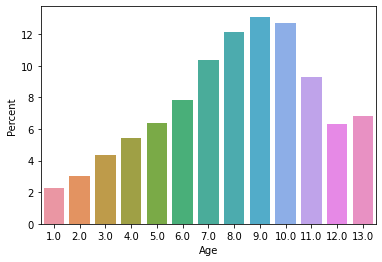

In [ ]:
%%time
# Show the Age group and overall count (%)
sns.barplot(x="Age", y="Percent",data=age_group_tab.toPandas());

### 3.4 Heatmap of Correlation Coefficients

In [ ]:
%%time
# Check correlation
# Elaboration: Need to change to pandas dataframe first.

# Drop the target class column
df_corr = df.drop('HeartDisease')

# Select all the columns in the dataframe
df_corr.select(df_corr.columns)

# Convert dataframe into pandas dataframe to check correlation
df_corr.toPandas().head()

CPU times: user 3.14 s, sys: 187 ms, total: 3.33 s
Wall time: 5.94 s


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18,15,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0,0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30,30,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0,0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3,0,0.0,0.0,11.0,5.0,4.0


In [ ]:
%%time
'''
# Calculate and show the correlation
# Elaboration: Use the Statistics library because PySpark does not support
             .corr() function + Check for highly correlated variables.
'''

col_names = df_corr.columns
features = df_corr.rdd.map(lambda row: row[0:])

corr_mat = Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index = col_names
corr_df.columns = col_names
round(corr_df, 2)

CPU times: user 132 ms, sys: 9.59 ms, total: 142 ms
Wall time: 19.2 s


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,1.00,0.30,0.10,0.21,0.10,0.13,0.27,-0.13,-0.04,-0.06,...,0.04,0.02,0.30,0.06,0.16,0.22,0.05,0.34,-0.14,-0.17
HighChol,0.30,1.00,0.09,0.11,0.09,0.09,0.21,-0.08,-0.04,-0.04,...,0.04,0.01,0.21,0.06,0.12,0.14,0.03,0.27,-0.07,-0.09
CholCheck,0.10,0.09,1.00,0.03,-0.01,0.02,0.07,0.00,0.02,0.01,...,0.12,-0.06,0.05,-0.01,0.03,0.04,-0.02,0.09,0.00,0.01
BMI,0.21,0.11,0.03,1.00,0.01,0.02,0.22,-0.15,-0.09,-0.06,...,-0.02,0.06,0.24,0.09,0.12,0.20,0.04,-0.04,-0.10,-0.10
Smoker,0.10,0.09,-0.01,0.01,1.00,0.06,0.06,-0.09,-0.08,-0.03,...,-0.02,0.05,0.16,0.09,0.12,0.12,0.09,0.12,-0.16,-0.12
Stroke,0.13,0.09,0.02,0.02,0.06,1.00,0.11,-0.07,-0.01,-0.04,...,0.01,0.03,0.18,0.07,0.15,0.18,0.00,0.13,-0.08,-0.13
Diabetes,0.27,0.21,0.07,0.22,0.06,0.11,1.00,-0.12,-0.04,-0.06,...,0.02,0.04,0.30,0.07,0.18,0.22,0.03,0.19,-0.13,-0.17
PhysActivity,-0.13,-0.08,0.00,-0.15,-0.09,-0.07,-0.12,1.00,0.14,0.15,...,0.04,-0.06,-0.27,-0.13,-0.22,-0.25,0.03,-0.09,0.20,0.20
Fruits,-0.04,-0.04,0.02,-0.09,-0.08,-0.01,-0.04,0.14,1.00,0.25,...,0.03,-0.04,-0.10,-0.07,-0.04,-0.05,-0.09,0.06,0.11,0.08
Veggies,-0.06,-0.04,0.01,-0.06,-0.03,-0.04,-0.06,0.15,0.25,1.00,...,0.03,-0.03,-0.12,-0.06,-0.06,-0.08,-0.06,-0.01,0.15,0.15


CPU times: user 178 ms, sys: 111 ms, total: 289 ms
Wall time: 172 ms


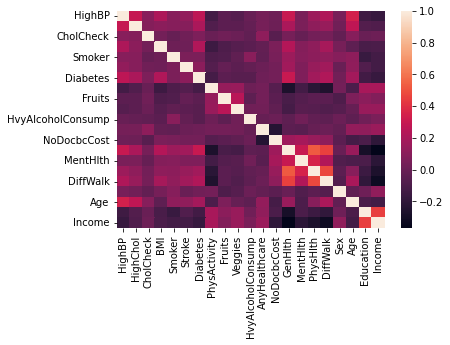

In [ ]:
%%time
# Show Heatmap correlation
sns.heatmap(corr_df);

#### 3.4.1 Check and Remove Highly Correlated Features (If Any)

In [ ]:
%%time
# Remove duplicate correlation diagonal
upper_tri = corr_df.where(np.triu(np.ones(corr_df.shape),k=1).astype(np.bool))
upper_tri

CPU times: user 3.07 ms, sys: 0 ns, total: 3.07 ms
Wall time: 3.57 ms


<timed exec>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,NaN,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,-0.061266,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,NaN,NaN,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,-0.039874,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,NaN,NaN,NaN,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,0.006121,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,NaN,NaN,NaN,NaN,0.013804,0.020153,0.224379,-0.147294,-0.087518,-0.062275,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,NaN,NaN,NaN,NaN,NaN,0.061173,0.062914,-0.087401,-0.077666,-0.030678,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,NaN,NaN,NaN,NaN,NaN,NaN,0.107179,-0.069151,-0.013389,-0.041124,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.121947,-0.042192,-0.058972,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142756,0.153150,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254342,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929
Veggies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.029584,-0.032232,-0.123066,-0.058884,-0.064290,-0.080506,-0.064765,-0.009771,0.154329,0.151087


In [ ]:
%%time
# Drop highly correlated columns (if any)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
to_drop

CPU times: user 5.66 ms, sys: 899 µs, total: 6.56 ms
Wall time: 7.79 ms


[]

In [ ]:
df.printSchema()

root
 |-- HeartDisease: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)



## 4.Data Modelling

### 4.1 Split Train & Test Sets

In [ ]:
%%time
# Split (70:30) the data into train and test set
# Elaboration: Data splitting is typically done to avoid overfitting.

train, test = df.randomSplit([0.7, 0.3], seed=0)

train, test

CPU times: user 2.18 ms, sys: 0 ns, total: 2.18 ms
Wall time: 21.3 ms


(DataFrame[HeartDisease: double, HighBP: double, HighChol: double, CholCheck: double, BMI: int, Smoker: double, Stroke: double, Diabetes: double, PhysActivity: double, Fruits: double, Veggies: double, HvyAlcoholConsump: double, AnyHealthcare: double, NoDocbcCost: double, GenHlth: double, MentHlth: int, PhysHlth: int, DiffWalk: double, Sex: double, Age: double, Education: double, Income: double],
 DataFrame[HeartDisease: double, HighBP: double, HighChol: double, CholCheck: double, BMI: int, Smoker: double, Stroke: double, Diabetes: double, PhysActivity: double, Fruits: double, Veggies: double, HvyAlcoholConsump: double, AnyHealthcare: double, NoDocbcCost: double, GenHlth: double, MentHlth: int, PhysHlth: int, DiffWalk: double, Sex: double, Age: double, Education: double, Income: double])

In [ ]:
%%time
print(f"Training Data Size: {train.count()}")
print(f"Test Data Size: {test.count()}")

Training Data Size: 177214
Test Data Size: 76466
CPU times: user 46.3 ms, sys: 4.17 ms, total: 50.5 ms
Wall time: 6.28 s


### 4.2 Solve Class Imbalance

In [ ]:
%%time
'''
# Balance the data (Solve class imbalance)
# Elaboration: Solve class imbalance by adding a new column weights and fill it
               with ratios of {0: 0.09, 1: 0.91} - is the ratio of class 0
               having 9% while class 1 for 91% of the total target class count.
'''

from pyspark.sql.functions import when

ratio = 0.91
def weight_balance(labels):
    return when(labels == 1, ratio).otherwise(1*(1-ratio))

train = train.withColumn('weights', weight_balance(F.col('HeartDisease')))
test = test.withColumn('weights', weight_balance(F.col('HeartDisease')))

train.show()

+------------+------+--------+---------+---+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+-------------------+
|HeartDisease|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|Diabetes|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|            weights|
+------------+------+--------+---------+---+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+-------------------+
|         0.0|   0.0|     0.0|      0.0| 15|   0.0|   0.0|     0.0|         0.0|   1.0|    0.0|              0.0|          0.0|        0.0|    1.0|       0|       0|     0.0|0.0| 1.0|      5.0|   7.0|0.08999999999999997|
|         0.0|   0.0|     0.0|      0.0| 15|   1.0|   0.0|     0.0|         0.0|   0.0|    0.0|              0.0|   

### 4.3 Vectorize Numerical Features (VectorAssembler)

In [ ]:
%%time
# Vectorize the numerical data
# Elaboration: Vectorize the numerical features first.

numerical_vector_assembler = VectorAssembler(inputCols=['BMI', 'MentHlth', 'PhysHlth'],
                                             outputCol='vectorized_numerical_features')

train = numerical_vector_assembler.transform(train)
test = numerical_vector_assembler.transform(test)

train.show(3)

+------------+------+--------+---------+---+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+-------------------+-----------------------------+
|HeartDisease|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|Diabetes|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|            weights|vectorized_numerical_features|
+------------+------+--------+---------+---+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+-------------------+-----------------------------+
|         0.0|   0.0|     0.0|      0.0| 15|   0.0|   0.0|     0.0|         0.0|   1.0|    0.0|              0.0|          0.0|        0.0|    1.0|       0|       0|     0.0|0.0| 1.0|      5.0|   7.0|0.08999999999999997|               [15.0,0.0,0.

In [ ]:
%%time
train.select('vectorized_numerical_features').take(3)

CPU times: user 23 ms, sys: 2.51 ms, total: 25.5 ms
Wall time: 2.53 s


[Row(vectorized_numerical_features=DenseVector([15.0, 0.0, 0.0])),
 Row(vectorized_numerical_features=DenseVector([15.0, 20.0, 28.0])),
 Row(vectorized_numerical_features=DenseVector([16.0, 0.0, 0.0]))]

### 4.4 Scale Numerical Features (StandardScaler)


In [ ]:
%%time
'''
# Scale the numerical data
# Elaboration: Scale the numerical features to maintain similar order
                of magnitude for modeling.
'''

scaler = StandardScaler(inputCol='vectorized_numerical_features',
                        outputCol='scaled_numerical_features',
                        withStd=True, withMean=True)

scaler = scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

train.show(3)

+------------+------+--------+---------+---+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+-------------------+-----------------------------+-------------------------+
|HeartDisease|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|Diabetes|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|            weights|vectorized_numerical_features|scaled_numerical_features|
+------------+------+--------+---------+---+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+-------------------+-----------------------------+-------------------------+
|         0.0|   0.0|     0.0|      0.0| 15|   0.0|   0.0|     0.0|         0.0|   1.0|    0.0|              0.0|          0.0|        0.0|    1.0|       0|       0|    

In [ ]:
%%time
train.select('scaled_numerical_features').take(3)

CPU times: user 21.6 ms, sys: 4.14 ms, total: 25.7 ms
Wall time: 2.27 s


[Row(scaled_numerical_features=DenseVector([-2.0283, -0.4306, -0.4866])),
 Row(scaled_numerical_features=DenseVector([-2.0283, 2.2651, 2.7193])),
 Row(scaled_numerical_features=DenseVector([-1.8767, -0.4306, -0.4866]))]

### 4.5 Categorical Features Pipeline: OneHotEncoder & VectorAssembler

In [ ]:
%%time
'''
# Categorical Features Pipeline: OneHotEncoder & VectorAssembler
# Elaboration: Categorical features are encoded and vectorized in a pipeline.

Since the features are double/float datatype, StringIndexer is not required.
'''

# List of categorical features
categorical_features= ['HighBP', 'HighChol', 'CholCheck',
                                          'Smoker', 'Stroke', 'Diabetes',
                                          'PhysActivity', 'Fruits', 'Veggies',
                                          'HvyAlcoholConsump', 'AnyHealthcare',
                                          'NoDocbcCost', 'GenHlth', 'DiffWalk',
                                          'Sex', 'Age', 'Education', 'Income']

# The index of string values multiple columns
'''
indexers = [
    StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))
    for c in categorical_features
]
'''

# The encode of indexed values multiple columns
encoders = [OneHotEncoder(dropLast=False,inputCol=c,
            outputCol="{0}_encoded".format(c))
    for c in categorical_features
]

# Vectorizing encoded values
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders],outputCol="encoded_feature_vector")

# Apply every stage into a pipeline
pipeline = Pipeline(stages=encoders+[assembler])
model = pipeline.fit(train)

train = model.transform(train)
test = model.transform(test)

train.show(3)

+------------+------+--------+---------+---+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+-------------------+-----------------------------+-------------------------+--------------+----------------+-----------------+--------------+--------------+----------------+--------------------+--------------+---------------+-------------------------+---------------------+-------------------+---------------+----------------+-------------+---------------+-----------------+--------------+----------------------+
|HeartDisease|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|Diabetes|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|            weights|vectorized_numerical_features|scaled_numerical_features|HighBP_encoded|HighChol_encoded|CholCheck_encoded|Smoker_encoded|Stroke_encoded|Diabetes_encoded|PhysActivity_e

### 4.6 Vectorize All Features (VectorAssembler)

In [ ]:
%%time
'''
# Assemble both together by vectorizing the data again.
# Elaboration: Now, vectorize all the features together to form the
                final feature vector.
'''

assembler = VectorAssembler(inputCols=['scaled_numerical_features',
                                       'encoded_feature_vector'],
                            outputCol='final_feature_vector')

train = assembler.transform(train)
test = assembler.transform(test)

train.show(3)

+------------+------+--------+---------+---+------+------+--------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+-------------------+-----------------------------+-------------------------+--------------+----------------+-----------------+--------------+--------------+----------------+--------------------+--------------+---------------+-------------------------+---------------------+-------------------+---------------+----------------+-------------+---------------+-----------------+--------------+----------------------+--------------------+
|HeartDisease|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|Diabetes|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|            weights|vectorized_numerical_features|scaled_numerical_features|HighBP_encoded|HighChol_encoded|CholCheck_encoded|Smoker_encoded|Stroke_encoded|Diabetes_e

In [ ]:
%%time
train.select('final_feature_vector').take(3)

CPU times: user 22.4 ms, sys: 3.08 ms, total: 25.5 ms
Wall time: 2.36 s


[Row(final_feature_vector=SparseVector(68, {0: -2.0283, 1: -0.4306, 2: -0.4866, 3: 1.0, 5: 1.0, 7: 1.0, 9: 1.0, 11: 1.0, 13: 1.0, 16: 1.0, 19: 1.0, 20: 1.0, 22: 1.0, 24: 1.0, 26: 1.0, 29: 1.0, 34: 1.0, 36: 1.0, 39: 1.0, 57: 1.0, 66: 1.0})),
 Row(final_feature_vector=SparseVector(68, {0: -2.0283, 1: 2.2651, 2: 2.7193, 3: 1.0, 5: 1.0, 7: 1.0, 10: 1.0, 11: 1.0, 13: 1.0, 16: 1.0, 18: 1.0, 20: 1.0, 22: 1.0, 25: 1.0, 26: 1.0, 33: 1.0, 35: 1.0, 36: 1.0, 48: 1.0, 58: 1.0, 63: 1.0})),
 Row(final_feature_vector=SparseVector(68, {0: -1.8767, 1: -0.4306, 2: -0.4866, 3: 1.0, 5: 1.0, 7: 1.0, 9: 1.0, 11: 1.0, 13: 1.0, 16: 1.0, 18: 1.0, 20: 1.0, 22: 1.0, 25: 1.0, 26: 1.0, 30: 1.0, 34: 1.0, 36: 1.0, 49: 1.0, 57: 1.0, 64: 1.0}))]

### 4.7 Fit the model (Logistic Regression)

In [ ]:
%%time
'''
# Logistic Regression Model
# Elaboration: Model fitting is a measure of how well a machine learning model
               generalizes to similar data to that on which it was trained.
               A model that is well-fitted produces more accurate outcomes.
               A model that is overfitted matches the data too closely.
               A model that is underfitted doesn't match closely enough.

# weightCol='weight' is the sampling function from pyspark to balance
  the target class using weight variable (which was created few steps ago).
'''

lr = LogisticRegression(labelCol='HeartDisease', featuresCol='final_feature_vector', weightCol='weights') #,maxIter=10

lr = lr.fit(train)

# Transform the train and test set
predict_train = lr.transform(train)
predict_test = lr.transform(test)

# Rename the columns for train set
predict_train = predict_train.withColumnRenamed('prediction',
                                                      'Predicted_HeartDisease')
predict_train = predict_train.withColumnRenamed('final_feature_vector',
                                                      'Features')

# Rename the columns for test set
predict_test = predict_test.withColumnRenamed('prediction',
                                                      'Predicted_HeartDisease')
predict_test = predict_test.withColumnRenamed('final_feature_vector',
                                                      'Features')

CPU times: user 147 ms, sys: 22.7 ms, total: 170 ms
Wall time: 18.9 s


In [ ]:
%%time
# Show the train table with predicted class column
predict_train.select('HeartDisease', 'Features', 'rawPrediction', 'Predicted_HeartDisease', 'probability').show(10)

+------------+--------------------+--------------------+----------------------+--------------------+
|HeartDisease|            Features|       rawPrediction|Predicted_HeartDisease|         probability|
+------------+--------------------+--------------------+----------------------+--------------------+
|         0.0|(68,[0,1,2,3,5,7,...|[4.88656868995633...|                   0.0|[0.99250925954284...|
|         0.0|(68,[0,1,2,3,5,7,...|[-0.0482901100604...|                   1.0|[0.48792981796679...|
|         0.0|(68,[0,1,2,3,5,7,...|[1.94632509286492...|                   0.0|[0.87504537741762...|
|         0.0|(68,[0,1,2,3,5,7,...|[3.13642783842414...|                   0.0|[0.95837059744983...|
|         0.0|(68,[0,1,2,3,5,7,...|[4.15787936163597...|                   0.0|[0.98460017291200...|
|         0.0|(68,[0,1,2,3,5,7,...|[2.26276694184969...|                   0.0|[0.90574611047406...|
|         0.0|(68,[0,1,2,3,5,7,...|[2.72493407820219...|                   0.0|[0.938482012

In [ ]:
%%time
# Show the test table with predicted class column
predict_test.select('HeartDisease', 'Features', 'rawPrediction', 'Predicted_HeartDisease', 'probability').show(10)

+------------+--------------------+--------------------+----------------------+--------------------+
|HeartDisease|            Features|       rawPrediction|Predicted_HeartDisease|         probability|
+------------+--------------------+--------------------+----------------------+--------------------+
|         0.0|(68,[0,1,2,3,5,7,...|[0.34850572710793...|                   0.0|[0.58625517479491...|
|         0.0|(68,[0,1,2,3,5,7,...|[4.28426470442607...|                   0.0|[0.98640365572169...|
|         0.0|(68,[0,1,2,3,5,7,...|[2.65001443973917...|                   0.0|[0.93401188048873...|
|         0.0|(68,[0,1,2,3,5,7,...|[1.39256029365313...|                   0.0|[0.80100066490169...|
|         0.0|(68,[0,1,2,3,5,7,...|[4.36159712273403...|                   0.0|[0.98740272074434...|
|         0.0|(68,[0,1,2,3,5,7,...|[2.76760607233991...|                   0.0|[0.94090000738125...|
|         0.0|(68,[0,1,2,3,5,7,...|[4.66499172924294...|                   0.0|[0.990668569

In [ ]:
# Convert the train dataframe to pandas dataframe
#predict_train_df = predict_train.toPandas()

#predict_train_df.head(3)

In [ ]:
# Convert the test dataframe to pandas dataframe
#predict_test_df = predict_test.toPandas()

#predict_test_df.head(3)

## 5.Model Evaluation

In [ ]:
%%time
# Convert train dataframe to rdd for predictionAndLabels
predictions_and_actuals_train = predict_train[['Predicted_HeartDisease',
                                        'HeartDisease']]

predictions_and_actuals_train_rdd = predictions_and_actuals_train.rdd

predictions_and_actuals_train_rdd.take(3)

CPU times: user 34.5 ms, sys: 3.87 ms, total: 38.4 ms
Wall time: 2.48 s


[Row(Predicted_HeartDisease=0.0, HeartDisease=0.0),
 Row(Predicted_HeartDisease=1.0, HeartDisease=0.0),
 Row(Predicted_HeartDisease=0.0, HeartDisease=0.0)]

In [ ]:
%%time
# Convert test dataframe to rdd for predictionAndLabels
predictions_and_actuals_test = predict_test[['Predicted_HeartDisease',
                                        'HeartDisease']]

predictions_and_actuals_test_rdd = predictions_and_actuals_test.rdd

predictions_and_actuals_test_rdd.take(3)

CPU times: user 28.4 ms, sys: 1.12 ms, total: 29.6 ms
Wall time: 2.38 s


[Row(Predicted_HeartDisease=0.0, HeartDisease=0.0),
 Row(Predicted_HeartDisease=0.0, HeartDisease=0.0),
 Row(Predicted_HeartDisease=0.0, HeartDisease=0.0)]

In [ ]:
%%time
predictions_and_actuals_train_rdd = predictions_and_actuals_train_rdd.map(tuple)

predictions_and_actuals_train_rdd.take(3)

CPU times: user 21.2 ms, sys: 2.27 ms, total: 23.4 ms
Wall time: 2.11 s


[(0.0, 0.0), (1.0, 0.0), (0.0, 0.0)]

In [ ]:
%%time
predictions_and_actuals_test_rdd = predictions_and_actuals_test_rdd.map(tuple)

predictions_and_actuals_test_rdd.take(3)

CPU times: user 20.8 ms, sys: 3.91 ms, total: 24.7 ms
Wall time: 1.99 s


[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]

## 5.Model Evaluation

In [ ]:
%%time
# Show Train Set Metrics (MulticlassMetrics)
# Elaboration: To show the model performance for the Train set.

train_metrics = MulticlassMetrics(predictions_and_actuals_train_rdd)

print('\nTrain Set Metrics (MulticlassMetrics)\n')

print(train_metrics.confusionMatrix().toArray())

s = '''
Accuracy:                     {0}
Weighted False-Positive Rate: {1}
Precision:                    {2}
Recall:                       {3}
Weighted True-Positive Rate:  {4}
'''.format(train_metrics.accuracy,
           train_metrics.weightedFalsePositiveRate,
           train_metrics.weightedPrecision,
           train_metrics.weightedRecall,
           train_metrics.weightedTruePositiveRate,
           #train_metrics for f1-score still beta version for PySpark
           )

print(s)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(



Train Set Metrics (MulticlassMetrics)

[[118362.  42087.]
 [  3255.  13510.]]

Accuracy:                     0.744139853510445
Weighted False-Positive Rate: 0.20060199118773633
Precision:                    0.9041529469251751
Recall:                       0.744139853510445
Weighted True-Positive Rate:  0.744139853510445

CPU times: user 102 ms, sys: 10.8 ms, total: 113 ms
Wall time: 11.9 s


In [ ]:
%%time
# Show test Set Metrics (MulticlassMetrics)
# Elaboration: To show the model performance for the Test set.

test_metrics = MulticlassMetrics(predictions_and_actuals_test_rdd)

print('\nTest Set Metrics (MulticlassMetrics)\n')

print(test_metrics.confusionMatrix().toArray())

s = '''
Accuracy:                     {0}
Weighted False-Positive Rate: {1}
Precision:                    {2}
Recall:                       {3}
Weighted True-Positive Rate:  {4}
'''.format(test_metrics.accuracy,
           test_metrics.weightedFalsePositiveRate,
           test_metrics.weightedPrecision,
           test_metrics.weightedRecall,
           test_metrics.weightedTruePositiveRate,
           #test_metrics for f1-score still beta version for PySpark
           )

print(s)


Test Set Metrics (MulticlassMetrics)

[[51223. 18115.]
 [ 1396.  5732.]]

Accuracy:                     0.7448408442968116
Weighted False-Positive Rate: 0.2019446607033673
Precision:                    0.9051312438094669
Recall:                       0.7448408442968116
Weighted True-Positive Rate:  0.7448408442968116

CPU times: user 61.7 ms, sys: 11.2 ms, total: 72.9 ms
Wall time: 6.72 s


In [ ]:
%%time
'''
# Show Train & Test Set PR and ROC Values (BinaryClassificationMetrics)
# Elaboration: It tells how much the model is capable of distinguishing between
  classes. Higher the AUC, the better the model is at predicting 0 classes as 0
  and 1 classes as 1. By analogy, the Higher the AUC, the better the model is
  at distinguishing between patients with the disease and no disease.
'''

train_metrics = BinaryClassificationMetrics(predictions_and_actuals_train_rdd)
test_metrics = BinaryClassificationMetrics(predictions_and_actuals_test_rdd)

print('\nTrain Set Metrics (BinaryClassificationMetrics)')
a = '''
Area under PR:           {0}
Area under ROC:          {1}
'''.format(train_metrics.areaUnderPR,
           train_metrics.areaUnderROC
           )

print(a)

print('\nTest Set Metrics (BinaryClassificationMetrics)')
b = '''
Area under PR:           {0}
Area under ROC:          {1}
'''.format(test_metrics.areaUnderPR,
           test_metrics.areaUnderROC
           )

print(b)


Train Set Metrics (BinaryClassificationMetrics)

Area under PR:           0.22859288823274157
Area under ROC:          0.7717689311613544


Test Set Metrics (BinaryClassificationMetrics)

Area under PR:           0.22595641373609637
Area under ROC:          0.7714480917967222

CPU times: user 127 ms, sys: 23.1 ms, total: 150 ms
Wall time: 16.9 s
